<!-- <center> -->
<h1> Using MOMENT for Anomaly Detection </h1>
<!-- </center> -->
<hr>

## Contents
### 1Loading of MOMENT

## 1. Introduction to Anomaly Detection

Detecting anomalous subsequences within time series data is important across various domains, spanning from manufacturing processes to financial applications and healthcare monitoring. An anomaly within a time series can indicate crucial events such as production faults, delivery bottlenecks, system defects, or irregular heart rhythms, making anomaly detection a focal point of interest. Given the large size and often intricate patterns exhibited by time series data, there is substantial interest in developing machine learning models to automatically identify anomalies. In this tutorial, we will explore how we can use MOMENT to detect anomalies in a zero-shot setting! Below, we mathematically describe the anomaly detection problem:


## 2. Loading MOMENT

We will first install the MOMENT package, load some essential packages and the pre-trained model.

MOMENT can be loaded in 4 modes: (1) `reconstruction`, (2) `embedding`, (3) `forecasting`, and (4) `classification`.

In the `reconstruction` mode, MOMENT reconstructs input time series, potentially containing missing values. We can solve imputation and anomaly detection problems in this mode. This mode is suitable for solving imputation and anomaly detection tasks. During pre-training, MOMENT is trained to predict the missing values within uniformly randomly masked patches (disjoint sub-sequences) of the input time series, leveraging information from observed data in other patches. As a result, MOMENT comes equipped with a pre-trained reconstruction head, enabling it to address anomaly detection challenges in a zero-shot manner!



In [ ]:
!git clone https://github.com/its-Pallabi/moment

Cloning into 'moment'...
remote: Enumerating objects: 770, done.
remote: Counting objects: 100% (619/619), done.
remote: Compressing objects: 100% (358/358), done.
remote: Total 770 (delta 437), reused 362 (delta 261), pack-reused 151
Receiving objects: 100% (770/770), 25.20 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (488/488), done.


In [ ]:
!pip install numpy pandas scikit-learn matplotlib tqdm
!pip install git+https://github.com/its-Pallabi/moment.git


  Cloning https://github.com/its-Pallabi/moment.git to /tmp/pip-req-build-woplj8_o
  Running command git clone --filter=blob:none --quiet https://github.com/its-Pallabi/moment.git /tmp/pip-req-build-woplj8_o
  Resolved https://github.com/its-Pallabi/moment.git to commit 0abdb6b2c750d7b2200c4ad1724fb8d3a651faeb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-no

In [ ]:
from momentfm import MOMENTPipeline
model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-large",
    model_kwargs={"task_name": "reconstruction"}, # For anomaly detection, we will load MOMENT in `reconstruction` mode
)


/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


config.json:   0%|          | 0.00/248 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

In [ ]:
model.init()
print(model)

MOMENTPipeline(
  (normalizer): RevIN()
  (tokenizer): Patching()
  (patch_embedding): PatchEmbedding(
    (value_embedding): Linear(in_features=8, out_features=1024, bias=False)
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
  

## Inputs and Outputs
We have used ECG data from TSB-UAD



In [ ]:
from pprint import pprint
import torch

# takes in tensor of shape [batchsize, n_channels, context_length]
#x = torch.randn(16, 1, 512)
x = torch.randn(16, 1, 512)
output = model(x)
pprint(output)

TimeseriesOutputs(forecast=None,
                  anomaly_scores=None,
                  logits=None,
                  labels=None,
                  input_mask=tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]),
                  pretrain_mask=tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]),
                  reconstruction=tensor([[[ 0.0685,  0.0089,  0.0658,  ...,  0.2826, -0.2037, -0.3823]],

        [[ 0.1765,  0.0498, -0.0831,  ..., -0.0509, -0.1299, -0.3409]],

        [[-0.3010, -0.2666, -0.1478,  ...,  0.1387,  0.0517, -0.1114]],

        ...,

        [[ 0.1630,  0.1101, -0.0285,  ...,  0.1832, -0.1744,  0.2

In [ ]:
from momentfm.data.anomaly_detection_dataset import AnomalyDetectionDataset
test_dataset = AnomalyDetectionDataset(data_split='test', random_seed=13)

In [ ]:
test_dataset.length_timeseries

180399

Now let's visualize the time series

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
idx = np.random.randint(0, len(test_dataset))
print("Shape of data item:", test_dataset[idx][0].shape)
print("Expected shape (n_channels, seq_len):", (test_dataset.n_channels, test_dataset.seq_len))



Shape of data item: (1, 512)
Expected shape (n_channels, seq_len): (1, 512)


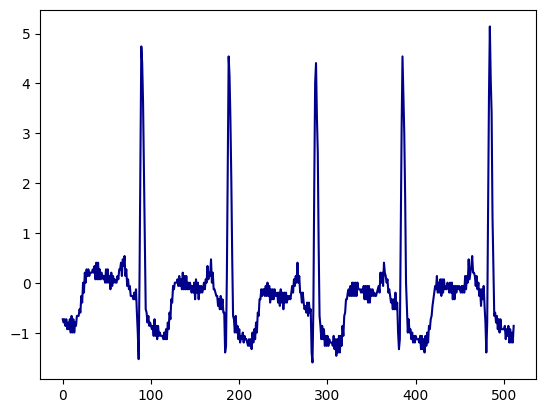

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.randint(0, len(test_dataset))
plt.plot(test_dataset[idx][0].squeeze(), c='darkblue')
plt.show()

### 4.1 Anomaly Detection using MOMENT
Now we will use MOMENT to compute anomaly scores for the time series.

In [ ]:
from torch.utils.data import DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=False)

In [ ]:
import torch
from tqdm import tqdm

# Assuming your model is already defined or loaded
from momentfm import MOMENT
#model = MOMENT.__init__() # Replace YourModel with the actual model class

# Move model to CPU
model = model.to("cpu").float()

trues, preds, labels = [], [], []
with torch.no_grad():
    for batch_x, batch_masks, batch_labels in tqdm(test_dataloader, total=len(test_dataloader)):
        batch_x = batch_x.to("cpu").float()
        batch_masks = batch_masks.to("cpu")

        output = model(batch_x, input_mask=batch_masks) # [batch_size, n_channels, window_size]

        trues.append(batch_x.detach().squeeze().numpy())  # Move to CPU and detach
        preds.append(output.reconstruction.detach().squeeze().numpy())  # Move to CPU and detach
        labels.append(batch_labels.detach().numpy())  # Move to CPU and detach


100%|██████████| 6/6 [05:40<00:00, 56.80s/it]


In [ ]:
print(f"Shape of trues: {len(trues)}")
print(f"Expected length from test_dataset: {test_dataset.length_timeseries}")
print(trues[0])


Shape of trues: 180399
Expected length from test_dataset: 180399
0.13788682


In [ ]:
for batch_x, batch_masks, batch_labels in test_dataloader:
    print(f"Batch X shape: {batch_x.shape}, Batch Masks shape: {batch_masks.shape}, Batch Labels shape: {batch_labels.shape}")


Batch X shape: torch.Size([64, 1, 512]), Batch Masks shape: torch.Size([64, 512]), Batch Labels shape: torch.Size([64, 1, 512])
Batch X shape: torch.Size([64, 1, 512]), Batch Masks shape: torch.Size([64, 512]), Batch Labels shape: torch.Size([64, 1, 512])
Batch X shape: torch.Size([64, 1, 512]), Batch Masks shape: torch.Size([64, 512]), Batch Labels shape: torch.Size([64, 1, 512])
Batch X shape: torch.Size([64, 1, 512]), Batch Masks shape: torch.Size([64, 512]), Batch Labels shape: torch.Size([64, 1, 512])
Batch X shape: torch.Size([64, 1, 512]), Batch Masks shape: torch.Size([64, 512]), Batch Labels shape: torch.Size([64, 1, 512])
Batch X shape: torch.Size([33, 1, 512]), Batch Masks shape: torch.Size([33, 512]), Batch Labels shape: torch.Size([33, 1, 512])


In [ ]:
import numpy as np

trues = np.concatenate(trues, axis=0).flatten()
preds = np.concatenate(preds, axis=0).flatten()
labels = np.concatenate(labels, axis=0).flatten()

# The last and the second to last windows have overlapping timesteps. We will remove these overlapping predictions
n_unique_timesteps = 512 - trues.shape[0] + test_dataset.length_timeseries
trues = np.concatenate([trues[:512*(test_dataset.length_timeseries//512)], trues[-n_unique_timesteps:]])
preds = np.concatenate([preds[:512*(test_dataset.length_timeseries//512)], preds[-n_unique_timesteps:]])
labels = np.concatenate([labels[:512*(test_dataset.length_timeseries//512)], labels[-n_unique_timesteps:]])
assert trues.shape[0] == test_dataset.length_timeseries

# We will use the Mean Squared Error (MSE) between the observed values and MOMENT's predictions as the anomaly score
anomaly_scores = (trues - preds)**2

In [ ]:
print(trues.shape)
print(preds.shape)
print(labels.shape)
print(anomaly_scores.shape)

(180399,)
(180399,)
(180399,)
(180399,)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(trues, preds)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.15078943967819214


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(trues, preds)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.21670269966125488


In [ ]:
# 1.9994139143549732
#Mean Squared Error (MSE): 0.15017589408307516

In [ ]:
print(anomaly_scores.shape)

(180399,)


In [ ]:
from momentfm.utils.anomaly_detection_metrics import adjbestf1

print(f"Zero-shot Adjusted Best F1 Score: {adjbestf1(y_true=labels, y_scores=anomaly_scores)}")

Zero-shot Adjusted Best F1 Score: 0.8358352331528018


[-0.9962703  -0.5959796  -0.9962703  ... -0.52926445 -0.6626947
 -0.7294098 ]
[-0.7479507  -0.1839213  -0.77283067 ... -0.16486672 -0.5062284
 -0.29758736]
[0.06166264 0.16979201 0.04992527 ... 0.13278571 0.0244817  0.18647063]


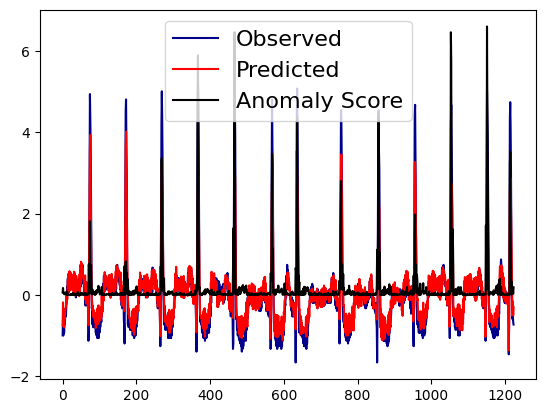

In [ ]:
anomaly_start = 81500
anomaly_end = 81700

start = anomaly_start-512
end = anomaly_end+512
print(trues[start:end])
print(preds[start:end])
print(anomaly_scores[start:end])
plt.plot(trues[start:end], label="Observed", c='darkblue')
plt.plot(preds[start:end], label="Predicted", c='red')
plt.plot(anomaly_scores[start:end], label="Anomaly Score", c='black')
plt.legend(fontsize=16)
plt.show()


As we can see from the figure, the anomaly score is higher around the anomaly.

In [ ]:
total=len(test_dataloader)
print(total)

In [ ]:
# Optimization
from momentfm.utils.masking import Masking
import torch.nn as nn
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

mask_generator = Masking(mask_ratio=0.3) # Mask 30% of patches randomly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for batch_x, batch_masks, batch_labels  in tqdm(test_dataloader, total=len(test_dataloader)):
    n_channels = batch_x.shape[1]

    # Reshape to [batch_size * n_channels, 1, window_size]
    batch_x = batch_x.reshape((-1, 1, 512)).float()

    batch_masks = batch_masks.to(device).long()
    batch_masks = batch_masks.repeat_interleave(n_channels, axis=0)

    # Randomly mask some patches of data
    mask = mask_generator.generate_mask(
        x=batch_x, input_mask=batch_masks).to(device).long()

    # Forward
    output = model(batch_x, input_mask=batch_masks, mask=mask)


    # Compute loss
    loss = criterion(output.reconstruction, batch_x)

    print(f"loss: {loss.item()}")

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

 17%|█▋        | 1/6 [01:02<05:13, 62.66s/it]

loss: 0.2778772711753845


 33%|███▎      | 2/6 [02:06<04:12, 63.13s/it]

loss: 0.25384020805358887


 50%|█████     | 3/6 [03:17<03:20, 66.81s/it]

loss: 0.2743498682975769


 67%|██████▋   | 4/6 [04:21<02:11, 65.96s/it]

loss: 0.2741210460662842


 83%|████████▎ | 5/6 [05:25<01:04, 64.99s/it]

loss: 0.2954460680484772


100%|██████████| 6/6 [05:56<00:00, 59.37s/it]

loss: 0.28890928626060486
